# Visualização do código

In [103]:
"""
Pedro Paiva Ladeira

Codigo do painel de controle feito com a finalidade de projeto de graduacao pela Universidade Federal do Espírito Santo

"""
# Imports
import pandas as pd
import tkinter as tk
import bokeh as bk
import matplotlib as plt

from tkinter import filedialog

# from bokeh import figure, output_file, show


In [5]:
# Leitura bruta do arquivo CSV
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

tabela_bruta = pd.read_csv(file_path)


In [6]:
# Gráficos e Tabelas Úteis

#variável com todas as colunas que se repetem no dado bruto (Faltam as últimas 6 que deram problemas de inconsistencias)
colunas_repetidas = ['ID_CURSO_ALUNO','COD_CURSO','NOME_CURSO','ANO_INGRESSO','FORMA_INGRESSO','FORMA_EVASAO','PERIODO_ALUNO','TIPO_INSTUICAO_SEGUNDO_GRAU','NACIONALIADE','NATURALIDADE','UF_NATURALIDADE','COTISTA','PLANO_ESTUDO']


In [7]:
#coluna com a quantidade de disciplinas que o aluno fez
disciplinas = tabela_bruta.groupby(colunas_repetidas).COD_DISCIPLINA.count().to_frame().reset_index()

In [8]:
#coluna com a média não ponderada das notas do aluno
media_final = tabela_bruta.groupby(colunas_repetidas).MEDIA_FINAL.mean().to_frame().reset_index()
media_final = media_final['MEDIA_FINAL'] # gambiarra...

In [11]:
#junção das informações
tabela_refinada = pd.concat([media_final, disciplinas], axis=1, sort=False)


In [134]:
#### SITUACÃO DOS ALUNOS ######
nome_evasao = ['Desistência','Desligamento: Resolução 68/2017-CEPE','Desligamento por Abandono','Desligamento: Descumpriu Plano de Estudos','Reopção de curso','Adaptação Curricular','Transferido','Desligamento: 3 reprovações em 1 disciplina']
forma_evasao = tabela_refinada['FORMA_EVASAO']

situacao = forma_evasao.value_counts();

situacao

Sem evasão                                     297
Formado                                        118
Desistência                                     28
Desligamento: Resolução 68/2017-CEPE            13
Desligamento por Abandono                       12
Desligamento: Descumpriu Plano de Estudos        3
Reopção de curso                                 3
Adaptação Curricular                             1
Transferido                                      1
Desligamento: 3 reprovações em 1 disciplina      1
Name: FORMA_EVASAO, dtype: int64

Sem evasão    297
Formado       118
Evadiu         62
Name: FORMA_EVASAO, dtype: int64

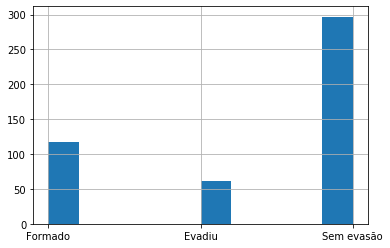

In [138]:
a = tabela_refinada['FORMA_EVASAO'].replace(nome_evasao, 'Evadiu')
a.hist()
a.value_counts()

In [124]:
tabela_refinada.groupby('FORMA_EVASAO').describe() #serve para algumas análises numéricas

MEDIA_FINAL                      \
                                                  count      mean       std   
FORMA_EVASAO                                                                  
Adaptação Curricular                                1.0  5.028462       NaN   
Desistência                                        28.0  5.573848  2.896111   
Desligamento por Abandono                          10.0  3.887044  3.154413   
Desligamento: 3 reprovações em 1 disciplina         1.0  6.152000       NaN   
Desligamento: Descumpriu Plano de Estudos           3.0  7.358740  2.578042   
Desligamento: Resolução 68/2017-CEPE               12.0  3.760665  3.129020   
Formado                                           118.0  8.060319  0.643065   
Reopção de curso                                    3.0  7.455072  0.325820   
Sem evasão                                        295.0  8.097209  1.518982   
Transferido                                         1.0  6.069571       NaN   

                                                                           \
                                                  min       25%       50%   
FORMA_EVASAO                                                                
Adaptação Curricular                         5.028462  5.028462  5.028462   
Desistência                                  0.000000  4.370000  6.108750   
Desligamento por Abandono                    0.000000  0.543333  4.722143   
Desligamento: 3 reprovações em 1 disciplina  6.152000  6.152000  6.152000   
Desligamento: Descumpriu Plano de Estudos    4.848947  6.038110  7.227273   
Desligamento: Resolução 68/2017-CEPE         0.000000  0.000000  4.477500   
Formado                                      5.923140  7.664182  8.130584   
Reopção de curso                             7.084815  7.333607  7.582400   
Sem evasão                                   0.000000  7.534438  8.485294   
Transferido                                  6.069571  6.069571  6.069571   

                                                                  \
                                                  75%        max   
FORMA_EVASAO                                                       
Adaptação Curricular                         5.028462   5.028462   
Desistência                                  7.300962   9.540000   
Desligamento por Abandono                    5.838000   8.247000   
Desligamento: 3 reprovações em 1 disciplina  6.152000   6.152000   
Desligamento: Descumpriu Plano de Estudos    8.613636  10.000000   
Desligamento: Resolução 68/2017-CEPE         5.407812   9.333333   
Formado                                      8.558543   9.116071   
Reopção de curso                             7.640200   7.698000   
Sem evasão                                   9.160219   9.783077   
Transferido                                  6.069571   6.069571   

                                            ID_CURSO_ALUNO                 \
                                                     count           mean   
FORMA_EVASAO                                                                
Adaptação Curricular                                   1.0  333079.000000   
Desistência                                           28.0  319029.357143   
Desligamento por Abandono                             12.0  294916.750000   
Desligamento: 3 reprovações em 1 disciplina            1.0  280198.000000   
Desligamento: Descumpriu Plano de Estudos              3.0  322263.333333   
Desligamento: Resolução 68/2017-CEPE                  13.0  327527.230769   
Formado                                              118.0  300217.118644   
Reopção de curso                                       3.0  326828.666667   
Sem evasão                                           297.0  330539.289562   
Transferido                                            1.0  293301.000000   

                                             ... PERIODO_ALUNO        \
                                             ...       